# Importing of Libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time

# Loading the CSV FILE and Describing the data (Using Statistic Function)


In [30]:
df = pd.read_csv('/content/Energy Consumption Data.csv')
obiedo = df
stats = df.describe()
print(stats)

               WEEK  DAY OF THE WEEK  MONTH OF THE YEAR  WORKING DAY OR NOT  \
count  60516.000000     60516.000000       60516.000000        60516.000000   
mean      26.819849         3.999256           6.504990            0.673177   
std       15.122016         1.999169           3.460984            0.469056   
min        1.000000         1.000000           1.000000            0.000000   
25%       14.000000         2.000000           3.750000            0.000000   
50%       27.000000         4.000000           6.000000            1.000000   
75%       40.000000         6.000000          10.000000            1.000000   
max       53.000000         7.000000          12.000000            1.000000   

       AVERAGE TEMPERATURE  AVERAGE RAINFALL            AD  
count         51756.000000      51756.000000  60516.000000  
mean             27.565616          6.625481   6829.052749  
std               3.083691         14.129387   1228.375474  
min              16.000000          0.000000

# Converting the data types
adding a error handling function

In [31]:
df['date_time'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d-%b-%y %H:%M')
df['AD'] = pd.to_numeric(df['AD'], errors ='coerce')
df['Ave_Temp'] = pd.to_numeric(df['AVERAGE TEMPERATURE'], errors = 'coerce')
df['Ave_Rainfall'] = pd.to_numeric(df['AVERAGE RAINFALL'], errors = 'coerce')

# Remove the Null Values

In [32]:
obiedo = obiedo.dropna()
obiedo

,Date,Time,WEEK,DAY OF THE WEEK,MONTH OF THE YEAR,WORKING DAY OR NOT,AVERAGE TEMPERATURE,AVERAGE RAINFALL,AD,date_time,Ave_Temp,Ave_Rainfall
0,1-Jan-12,1:00,1,1,1,0,23.0,0.0,4621.02,2012-01-01 01:00:00,23.0,0.0
1,1-Jan-12,2:00,1,1,1,0,22.0,0.0,4264.81,2012-01-01 02:00:00,22.0,0.0
2,1-Jan-12,3:00,1,1,1,0,22.0,0.0,3964.79,2012-01-01 03:00:00,22.0,0.0
3,1-Jan-12,4:00,1,1,1,0,22.0,0.0,3799.18,2012-01-01 04:00:00,22.0,0.0
4,1-Jan-12,5:00,1,1,1,0,21.0,0.0,3723.47,2012-01-01 05:00:00,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
51751,31-Dec-17,20:00,53,1,12,0,25.0,0.0,6207.97,2017-12-31 20:00:00,25.0,0.0
51752,31-Dec-17,21:00,53,1,12,0,25.0,0.0,5991.03,2017-12-31 21:00:00,25.0,0.0
51753,31-Dec-17,22:00,53,1,12,0,25.0,0.0,5805.79,2017-12-31 22:00:00,25.0,0.0
51754,31-Dec-17,23:00,53,1,12,0,23.0,0.0,5642.59,2017-12-31 23:00:00,23.0,0.0


# Extracting year quarter month and day using lambda

In [33]:
df.loc[:, 'year'] = df['date_time'].apply(lambda x: x.year)
df.loc[:, 'quarter'] = df['date_time'].apply(lambda x: x.quarter)
df.loc[:, 'month'] = df['date_time'].apply(lambda x: x.month)
df.loc[:, 'day'] = df['date_time'].apply(lambda x: x.day)

# Re Arranging the table


In [34]:
df = df.loc[:, ['date_time', 'year', 'quarter', 'month', 'day', 'Ave_Temp', 'Ave_Rainfall', 'AD']]
df.sort_values('date_time', inplace = True, ascending = True)
df = df.reset_index(drop = True)
df

,date_time,year,quarter,month,day,Ave_Temp,Ave_Rainfall,AD
0,2012-01-01 00:00:00,2012,1,1,1,23.0,0.0,4228.71
1,2012-01-01 01:00:00,2012,1,1,1,23.0,0.0,4621.02
2,2012-01-01 02:00:00,2012,1,1,1,22.0,0.0,4264.81
3,2012-01-01 03:00:00,2012,1,1,1,22.0,0.0,3964.79
4,2012-01-01 04:00:00,2012,1,1,1,22.0,0.0,3799.18
...,...,...,...,...,...,...,...,...
60511,2018-12-31 19:00:00,2018,4,12,31,NaN,NaN,6219.24
60512,2018-12-31 20:00:00,2018,4,12,31,NaN,NaN,5923.11
60513,2018-12-31 21:00:00,2018,4,12,31,NaN,NaN,5707.83
60514,2018-12-31 22:00:00,2018,4,12,31,NaN,NaN,5531.19


In [48]:
df['Weekday'] = df.apply(lambda row: row['date_time'].weekday(), axis = 1)
df['Weekday'] = (df['Weekday'] <5). astype(int)

df['Day_Name'] = df['date_time'].dt.day_name()
df['Month_Name'] = df['date_time'].dt.month_name()

weekly_AD_Avg = df.groupby('Day_Name')['AD'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)


In [49]:

print(df.shape)
print(df.date_time.min())
print(df.date_time.max())
df


(60516, 12)
2012-01-01 00:00:00
2018-12-31 23:00:00


,date_time,year,quarter,month,day,Ave_Temp,Ave_Rainfall,AD,weekday,Weekday,Day_Name,Month_Name
0,2012-01-01 00:00:00,2012,1,1,1,23.0,0.0,4228.71,0,0,Sunday,January
1,2012-01-01 01:00:00,2012,1,1,1,23.0,0.0,4621.02,0,0,Sunday,January
2,2012-01-01 02:00:00,2012,1,1,1,22.0,0.0,4264.81,0,0,Sunday,January
3,2012-01-01 03:00:00,2012,1,1,1,22.0,0.0,3964.79,0,0,Sunday,January
4,2012-01-01 04:00:00,2012,1,1,1,22.0,0.0,3799.18,0,0,Sunday,January
...,...,...,...,...,...,...,...,...,...,...,...,...
60511,2018-12-31 19:00:00,2018,4,12,31,NaN,NaN,6219.24,1,1,Monday,December
60512,2018-12-31 20:00:00,2018,4,12,31,NaN,NaN,5923.11,1,1,Monday,December
60513,2018-12-31 21:00:00,2018,4,12,31,NaN,NaN,5707.83,1,1,Monday,December
60514,2018-12-31 22:00:00,2018,4,12,31,NaN,NaN,5531.19,1,1,Monday,December


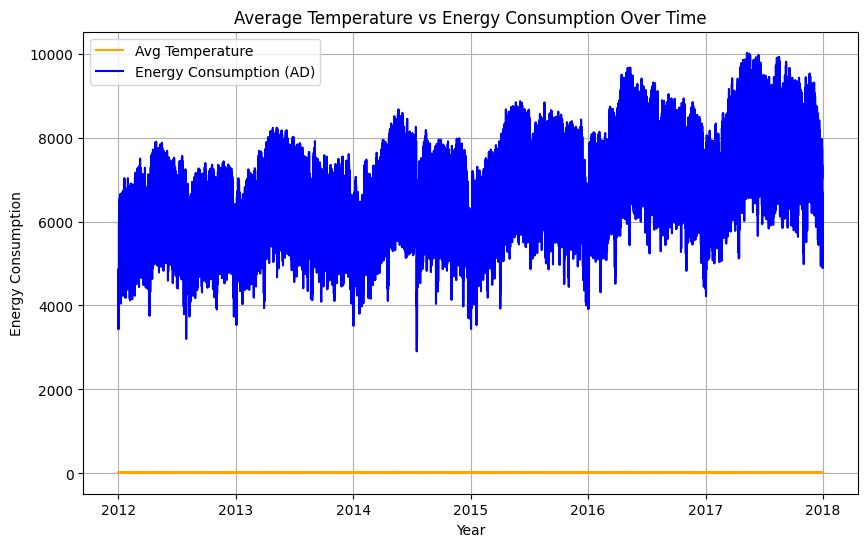

In [50]:
plt.figure(figsize=(10, 6))

sns.lineplot(x = obiedo['date_time'],y = obiedo['Ave_Temp'], label='Avg Temperature', color='orange')

sns.lineplot(x = obiedo['date_time'],y = obiedo['AD'], label='Energy Consumption (AD)', color='blue')

plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Average Temperature vs Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()


The line chart compares the average temperature and energy consumption over the years . We might be expecting that higher temperatures could lead to increased energy consumption due to higher demand for cooling systems such as air conditioners. However, after assessing the chart, it is clear that there is **no strong** or consistent correlation between the two variables. This maybe due to the data gathered is from communities with great building insulations and efficient cooling/heating systems, or it can suggest that the missing key points in order to drill down and reveal clearer patterns.

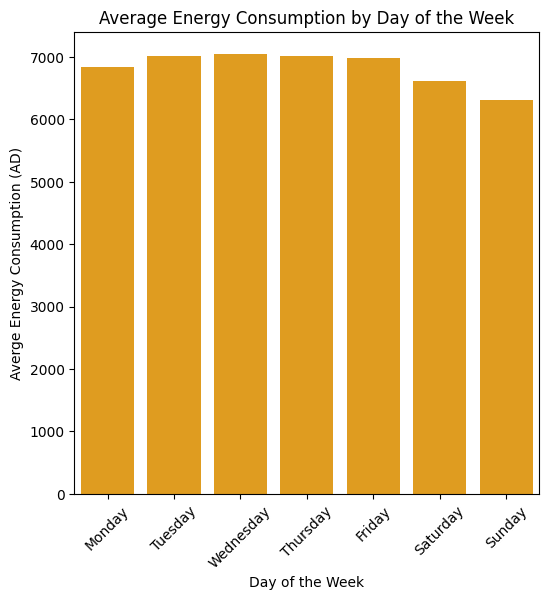

In [51]:
plt.figure(figsize=(6, 6))
sns.barplot(x=weekly_AD_Avg.index, y=weekly_AD_Avg.values, color='Orange')
plt.xlabel('Day of the Week')
plt.ylabel('Averge Energy Consumption (AD)')
plt.title('Average Energy Consumption by Day of the Week')
plt.xticks(rotation=45)
plt.show()

This bar chart shows the average energy consumption throughout the week, it indicates that energy consumption tends to be lower on weekends and higher on weekdays especially middle days of the week also showing relatively consistent energy consumption. The lower AD might reveal that commercial and industrial activities, such as business and offices are closed or operating in reduced hours, conversely middle days AD might be due to consistent business, office, and residential activities such as equipment, lighting, and cooling systems.

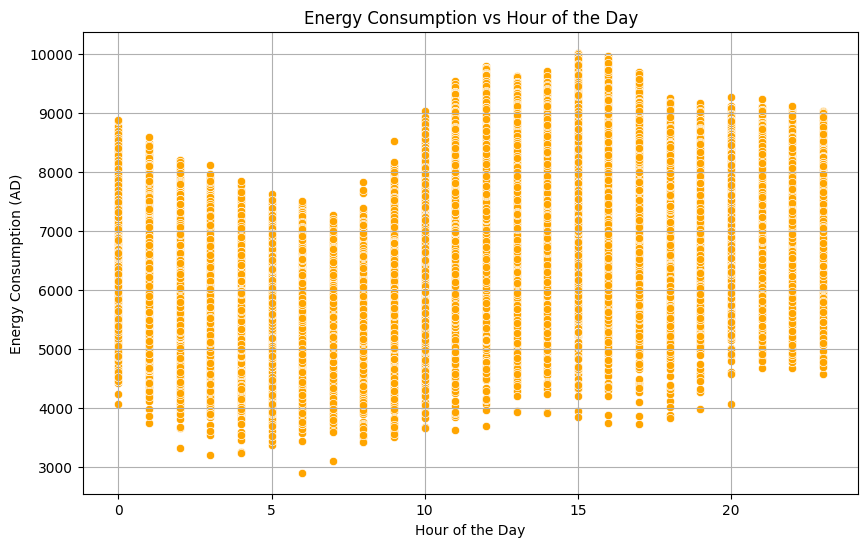

In [53]:
df['hour'] = obiedo['date_time'].dt.hour
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['hour'], y=df['AD'], color='Orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (AD)')
plt.title('Energy Consumption vs Hour of the Day')
plt.grid(True)
plt.show()

The scatter plot reveals the typical energy usage of daily human activity, for instance energy consumption peaking during the day and declining overnight. This reflects that the peaks are due to workday patterns and residential activity such as household routines like preparing for work or school and the declines are likely due to most people being asleep and fewer businesses are operating.

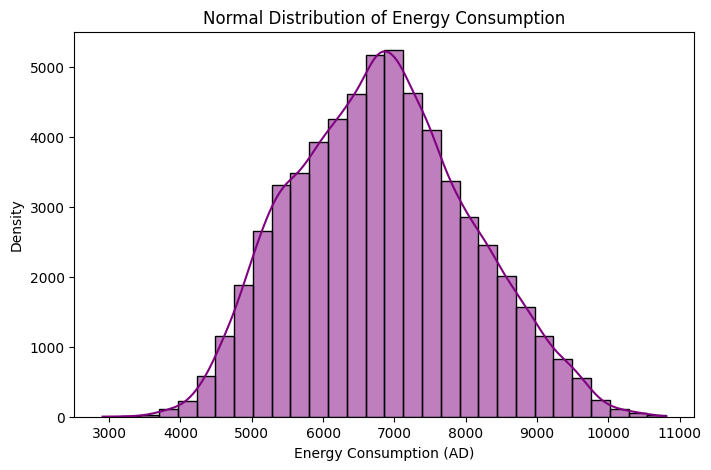

In [54]:
plt.figure(figsize=(8, 5))
sns.histplot(df['AD'], kde=True, color='purple', bins=30)
plt.title('Normal Distribution of Energy Consumption')
plt.xlabel('Energy Consumption (AD)')
plt.ylabel('Density')
plt.show()


The normal distribution chart shows a roughly normal distribution but slightly skewed to the right, with most values in the lower to mid-range indicating a moderate energy usage usually happens. However, the long right tail points to occasional days of higher consumption, possibly driven by seasonal peaks or special events. Overall, the distribution highlights a general pattern of moderate usage with occasional surges in energy consumption.

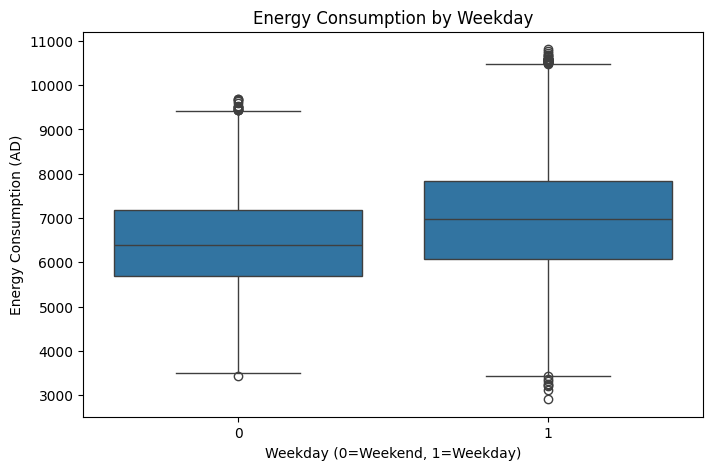

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Weekday', y='AD', data=df)
plt.xlabel('Weekday (0=Weekend, 1=Weekday)')
plt.ylabel('Energy Consumption (AD)')
plt.title('Energy Consumption by Weekday')
plt.show()

The box plot displays the variation in energy consumption (AD) between weekdays and weekends. It reveals that weekdays generally show higher energy consumption with a wider range of values, and weekends exhibits lower overall consumption, indicates reduced energy use. The difference between the two categories highlights the impact of the workweek on energy demand patterns.

<ipython-input-56-d6718de436bd>:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  fig1.plot(df['AD'].resample('A').mean(), linewidth = 1)
<ipython-input-56-d6718de436bd>:12: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fig2.plot(df['AD'].resample('Q').mean(), linewidth = 1)
<ipython-input-56-d6718de436bd>:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fig3.plot(df['AD'].resample('M').mean(), linewidth = 1)


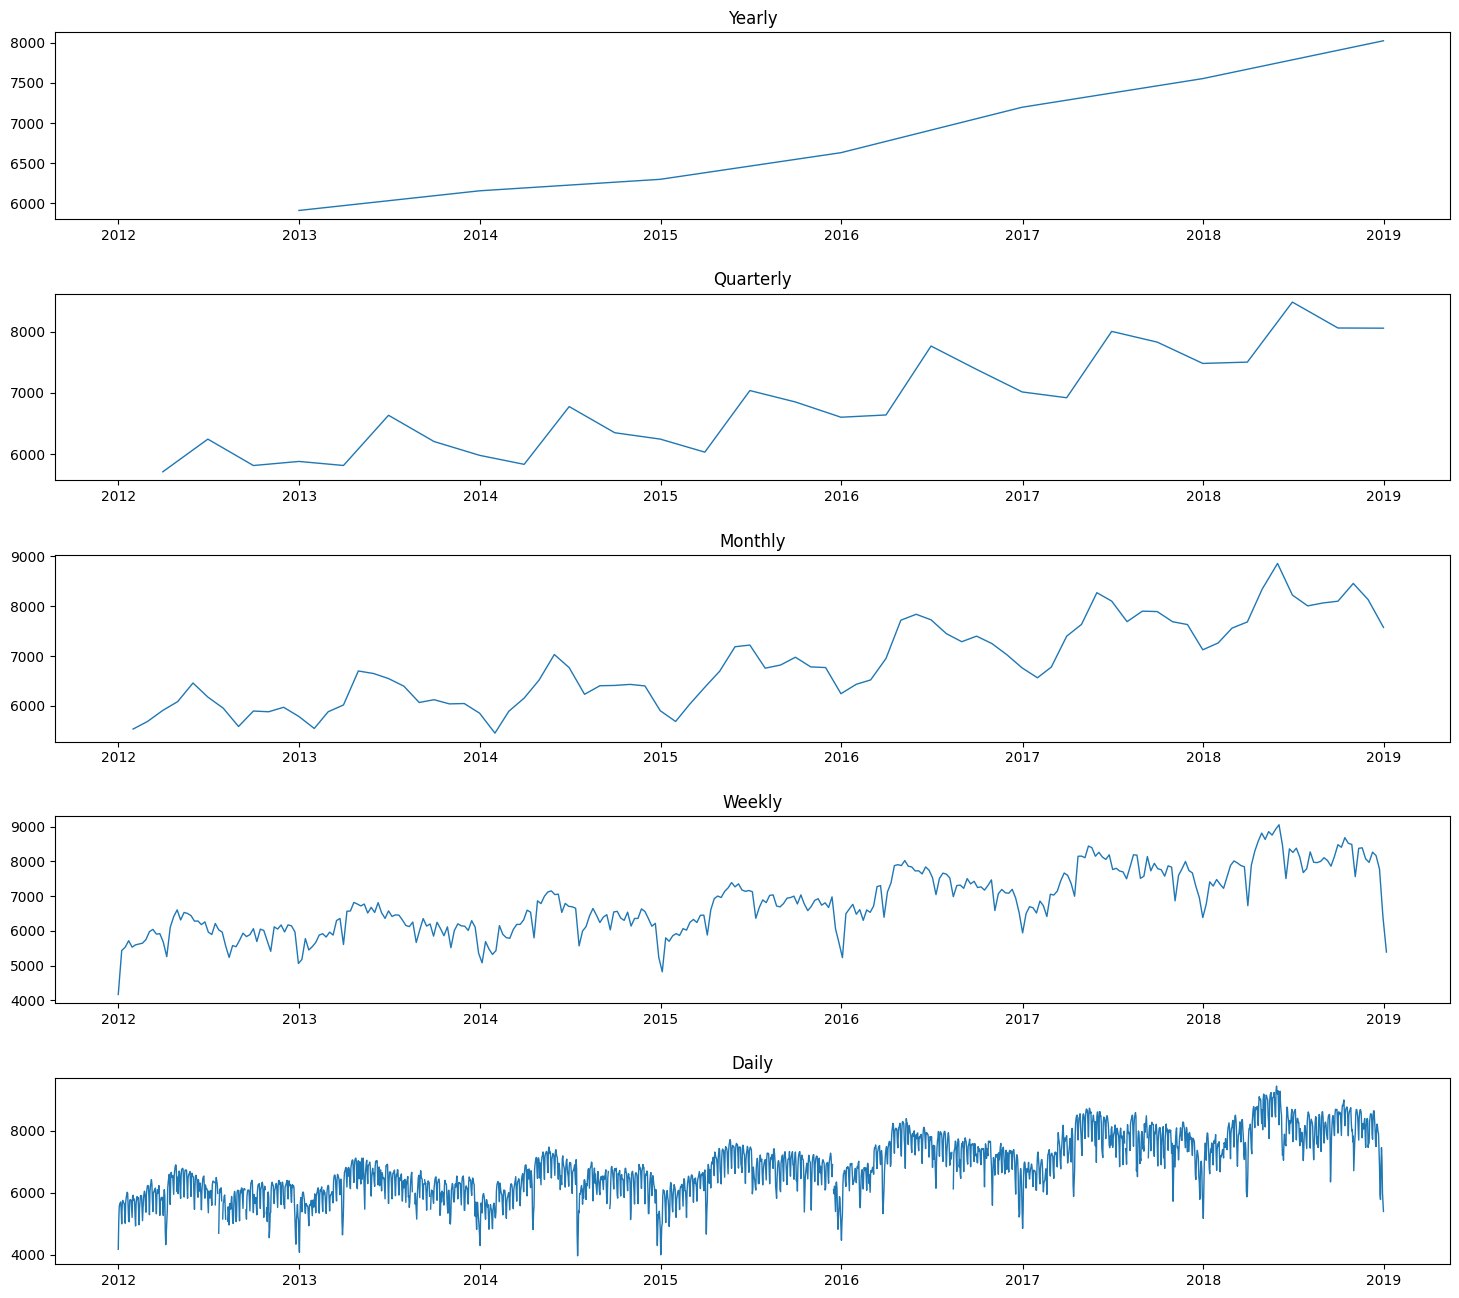

In [56]:
import matplotlib.ticker as tkr
df.set_index('date_time', inplace=True)
fig = plt.figure(figsize = (18,16))
fig.subplots_adjust(hspace = .4)

fig1 = fig.add_subplot(5,1,1)
fig1.plot(df['AD'].resample('A').mean(), linewidth = 1)
fig1.set_title('Yearly')
fig1.tick_params(axis = 'both', which = 'major')

fig2 = fig.add_subplot(5,1,2, sharex = fig1)
fig2.plot(df['AD'].resample('Q').mean(), linewidth = 1)
fig2.set_title('Quarterly')
fig2.tick_params(axis = 'both', which = 'major')

fig3 = fig.add_subplot(5,1,3, sharex = fig1)
fig3.plot(df['AD'].resample('M').mean(), linewidth = 1)
fig3.set_title('Monthly')
fig3.tick_params(axis = 'both', which = 'major')


fig4= fig.add_subplot(5,1,4, sharex = fig1)
fig4.plot(df['AD'].resample('W').mean(), linewidth = 1)
fig4.set_title('Weekly')
fig4.tick_params(axis = 'both', which = 'major')

fig5 = fig.add_subplot(5,1,5, sharex = fig1)
fig5.plot(df['AD'].resample('D').mean(), linewidth = 1)
fig5.set_title('Daily')
fig5.tick_params(axis = 'both', which = 'major')